In [1]:
library(ggplot2)
library(dplyr)
library(data.table)

adult <- fread('http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data', data.table = F)

str(adult)
colnames(adult) <- c('age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income')
a= adult
str(adult)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



'data.frame':	32561 obs. of  15 variables:
 $ V1 : int  39 50 38 53 28 37 49 52 31 42 ...
 $ V2 : chr  "State-gov" "Self-emp-not-inc" "Private" "Private" ...
 $ V3 : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ V4 : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ V5 : int  13 13 9 7 13 14 5 9 14 13 ...
 $ V6 : chr  "Never-married" "Married-civ-spouse" "Divorced" "Married-civ-spouse" ...
 $ V7 : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ V8 : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ V9 : chr  "White" "White" "White" "Black" ...
 $ V10: chr  "Male" "Male" "Male" "Male" ...
 $ V11: int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ V12: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V13: int  40 13 40 40 40 40 16 45 50 40 ...
 $ V14: chr  "United-States" "United-States" "United-States" "United-States" ...
 $ V15: chr  "<=50K" "<=50K" "<=50K" "<=50K" ...
'data.frame':	32561 obs. of  15 variables:
 $ age        

Using the fread function to read the table. Using data.table = F in fread function to turn off the this option, because we just want to read the table and import the data to R as dataframe. 

To process further we need to clean the data first. Notice that "?" in the data indicates NA value, we need to trasfrom this to NA. 

In [2]:
numcols = colnames(dplyr::select_if(adult, is.numeric))
charcols= colnames(dplyr::select_if(adult, is.character))

#replace ? to NA
for(i in 1:ncol(adult)){
  
  adult[,i] = ifelse(adult[,i] == '?', NA, adult[,i])
} 


sapply ( adult[,numcols],function(x) sum(is.na(x)) )

age         fnlwgt  education_num   capital_gain   capital_loss 
             0              0              0              0              0 
hours_per_week 
             0


           age         fnlwgt  education_num   capital_gain   capital_loss hours_per_week 
             0              0              0              0              0              0 

In [10]:

sapply ( adult[,charcols],function(x) sum(is.na(x)) )

workclass      education marital_status     occupation   relationship 
             0              0              0              0              0 
          race            sex native_country         income 
             0              0              0              0

     workclass      education marital_status     occupation   relationship           race 
          1836              0              0           1843              0              0 
           sex native_country         income 
             0            583              0 

Using sapply to check NA value in each column of the dataset. We notice that all of the NA values come from factor columns. For the simplicity of this demonstration, we drop those rows that has NA values. 

In [9]:
adult = adult[complete.cases(adult), ]

To visualise this dataset, we set up some functions to auto plot numeric variables compared to income category. 

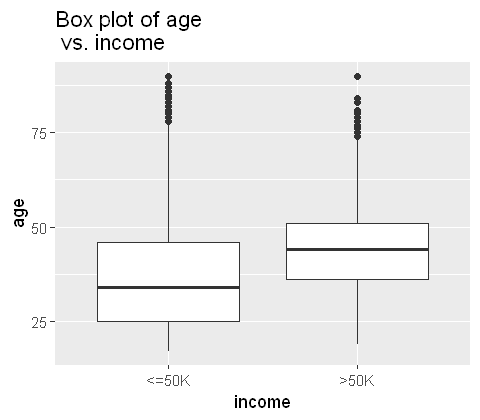

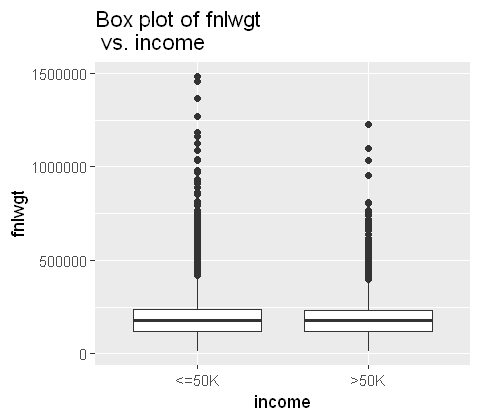

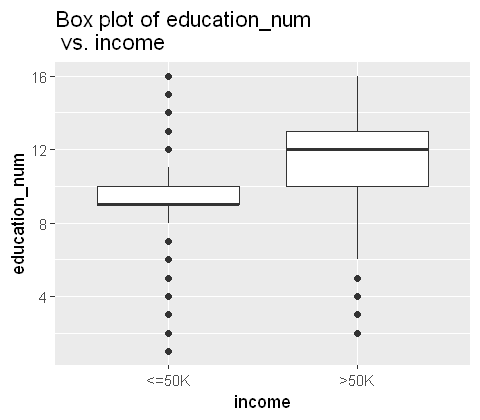

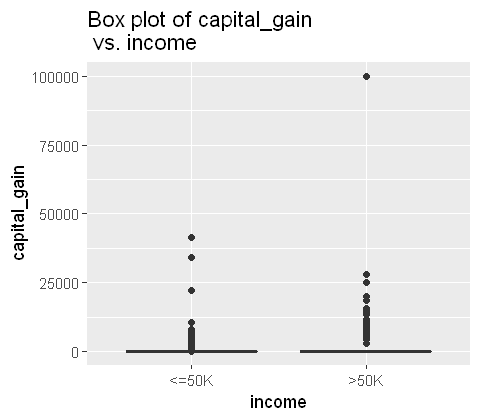

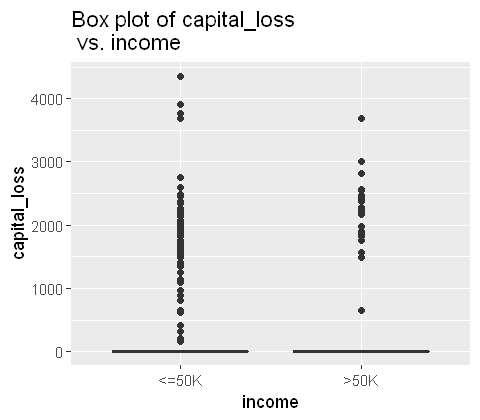

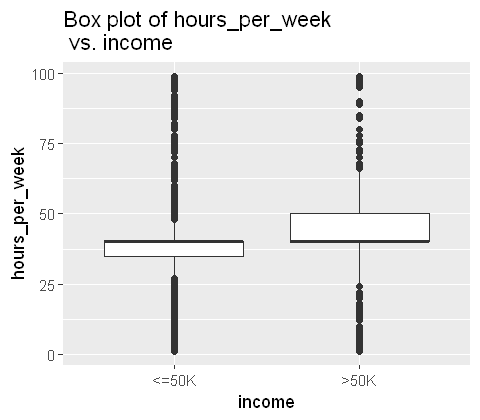

In [3]:
plot_box = function(df, cols, col_x = 'income'){
  options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
  for(col in cols){
    p = ggplot(df, aes_string(col_x, col)) + 
      geom_boxplot() +
      ggtitle(paste('Box plot of', col, '\n vs.', col_x))
    print(p)
  }
}

plot_box(adult, numcols)

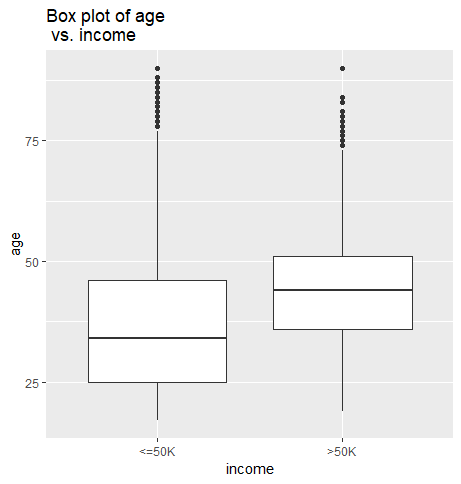

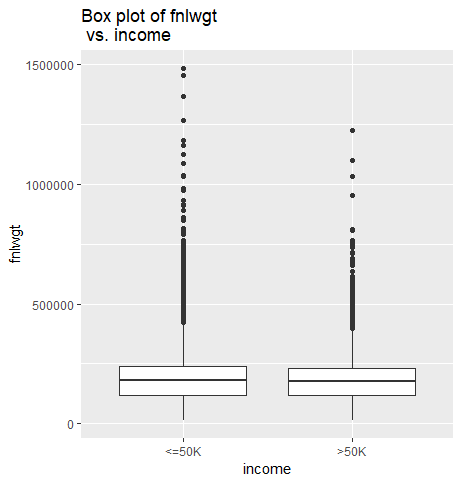

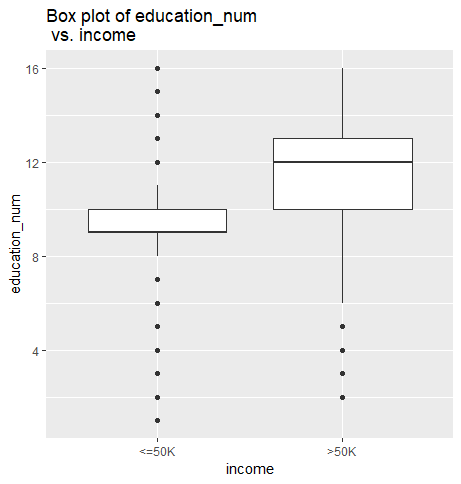

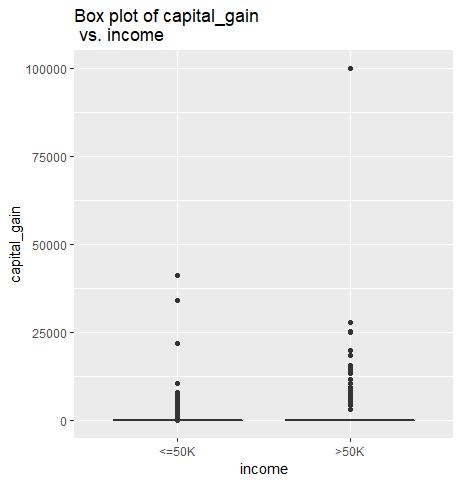

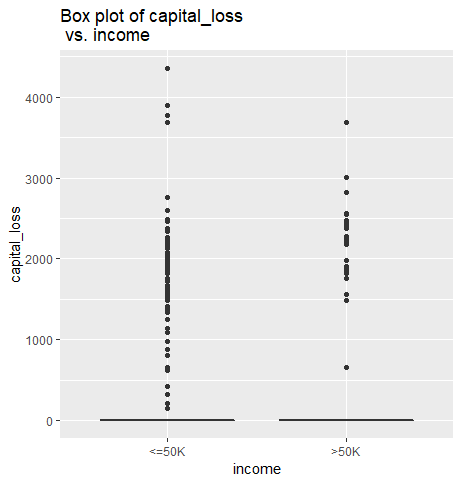

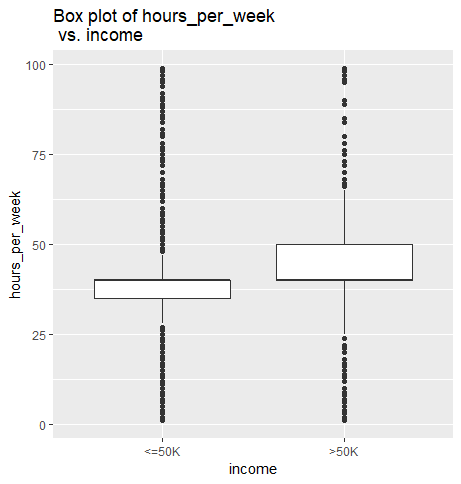

Having a quick look, we could see that age, education_num, hours_per_week have higher relevancy than fnlwgt, capital gain, capital loss. 

Now, we explore the relationship between those factor variables and our predictor variable

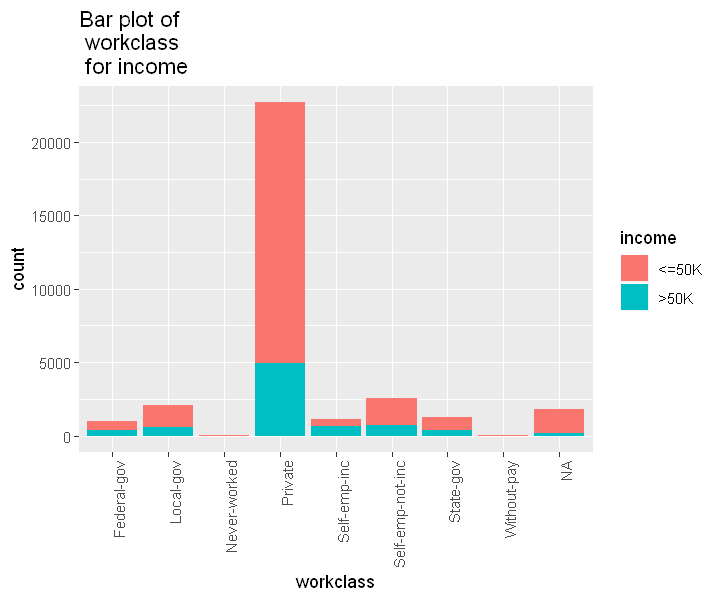

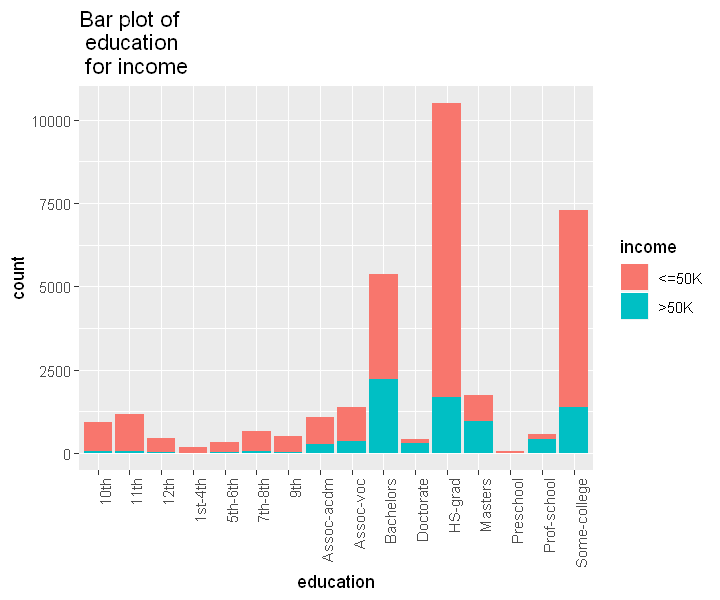

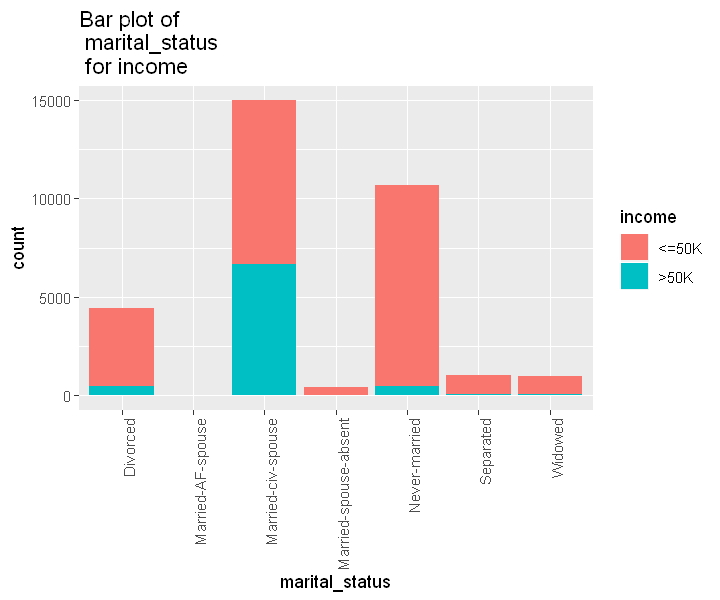

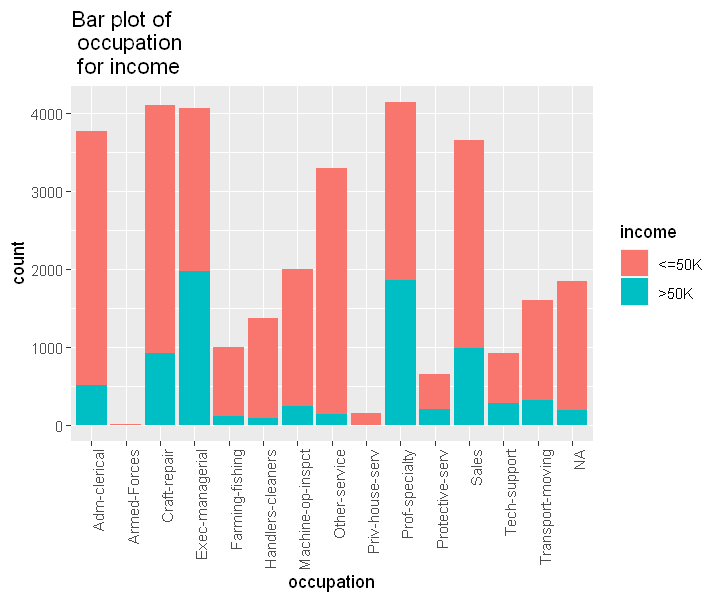

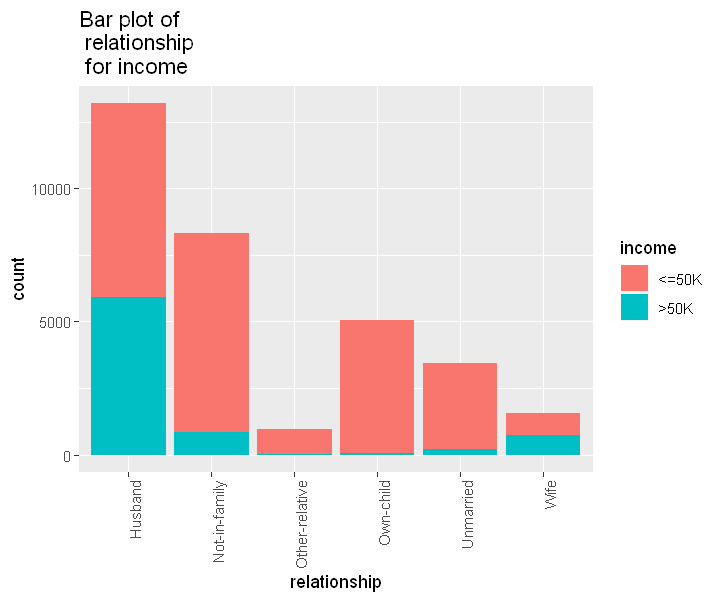

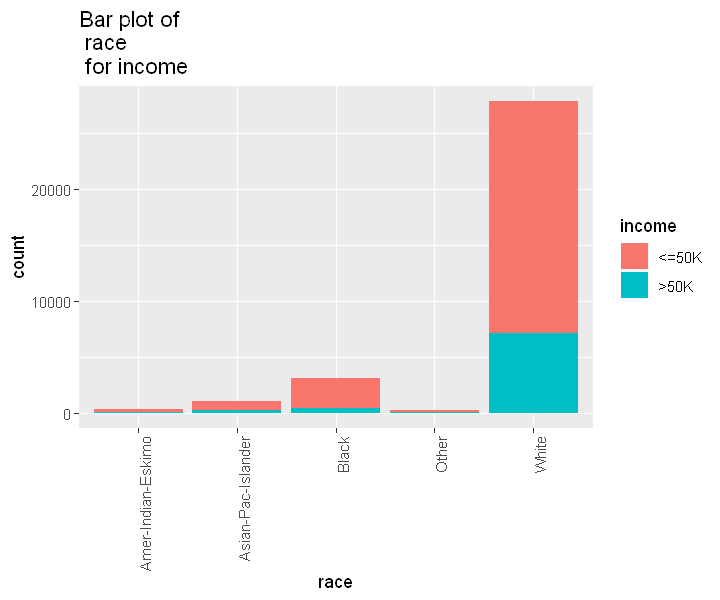

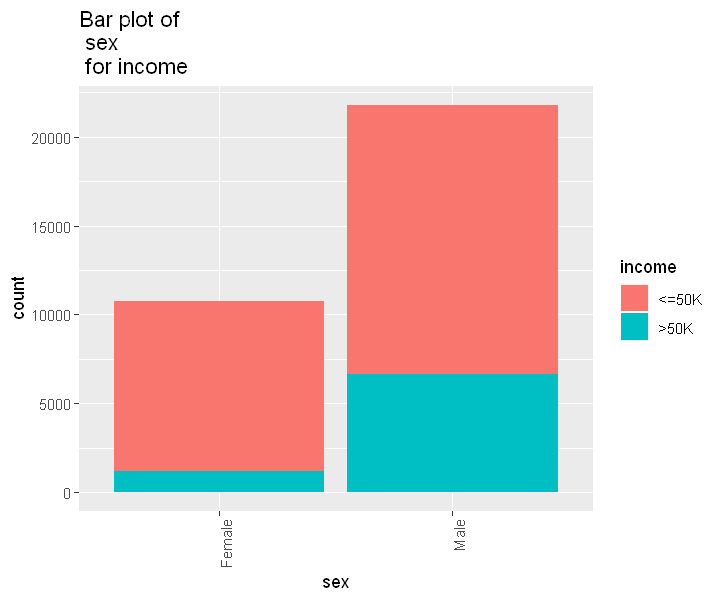

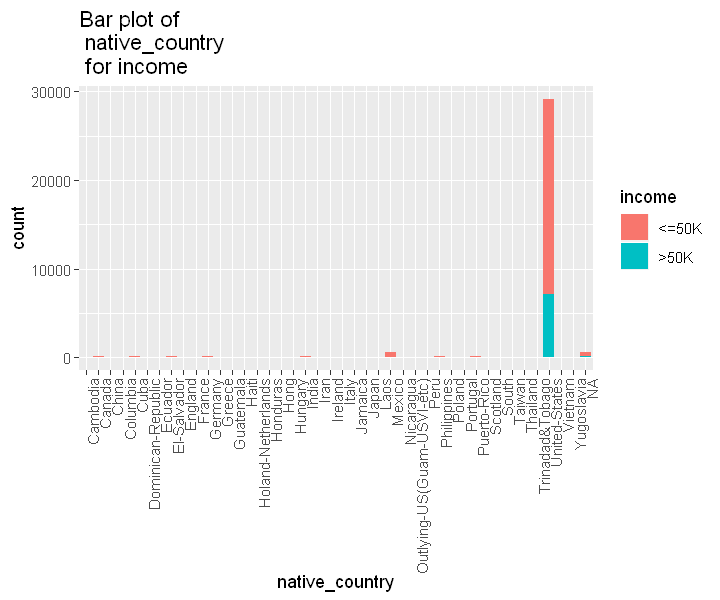

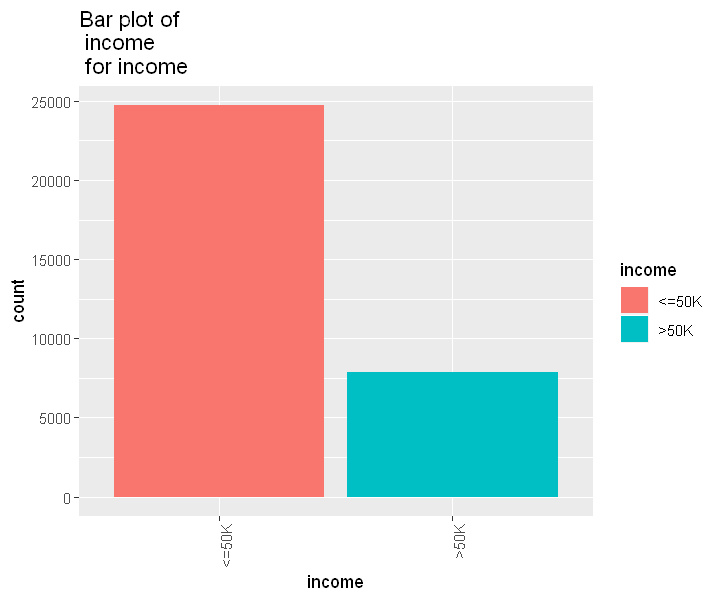

In [4]:
plot_bars2 = function(df, catcols){
  options(repr.plot.width=6, repr.plot.height=5) # Set the initial plot area dimensions
  for(col in catcols){
    p=ggplot(df, aes_string(x=col)) + 
      geom_bar(aes(fill =income))+
      ggtitle(paste('Bar plot of \n', col, '\n for income')) +  
      theme(axis.text.x = element_text(angle = 90, hjust = 1))
  print(p)
  }
}

plot_bars2(adult,charcols)

From the plots, we identify some of noticeably important factors such as marital status, relationship and sex; race and native country appear to be less relevant to income response. 

We will use cross validation approach to build and test our data with caret package; however, it will take a lot of time to process the data considering the size of this dataset. For demonstration, we will only use 20% of data. To apply this, we need to install and library the package caret. 

In [ ]:
library(repr)
library(dplyr)
library(caret)
library(randomForest)
library(MLmetrics)


library(lattice)
library(caret)

To process further in building the model, we need to scale and centre those numeric variables (using preProcess and predict function). 
Change the name of income to "low" or "high" becuase symbols "<=" is not acceptable for name in factor. 
Then we will create data partition for out data based on 20/80 ration

In [21]:



preProcValues= preProcess(adult[, numcols], 
                          method = c("center", "scale"))
adult[, numcols]= predict(preProcValues, adult[, numcols])


adult$income<- ifelse(adult$income == "<=50K","low", "high")

for (col in charcols) {
  adult[, col]= as.factor(adult[, col])
}



In [15]:
set.seed(124)
index= createDataPartition(adult$income,p=0.2, list = F)
d= adult[index,]

In [16]:
weights = ifelse(d$income == "low", 0.9, 0.1)

fitControl <- trainControl(method = "cv",
                           number = 5,
                           returnResamp="all",
                           savePredictions = TRUE,
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)

paraGrid = expand.grid(mtry = c(5, 10, 15))
set.seed(1234)
rf.fit_inside = train(income~., 
                      data = d,
                      method = "rf", 
                      trControl = fitControl,
                      tuneGrid = paraGrid,
                      weights = weights,
                      metric = "ROC") 
print(rf.fit_inside)

Random Forest 

6033 samples
  14 predictor
   2 classes: 'high', 'low' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4827, 4827, 4826, 4825, 4827 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   5    0.8885264  0.5153023  0.9492371
  10    0.8992491  0.6065338  0.9359948
  15    0.9018481  0.6285006  0.9326830

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 15.


To confirm our expection on those important and unnecessary variables, we use varImp to plot the model out base on important level

rf variable importance

  only 20 most important variables shown (out of 96)

                                 Overall
marital_statusMarried-civ-spouse 100.000
age                               89.652
capital_gain                      89.634
fnlwgt                            75.864
education_num                     74.976
hours_per_week                    58.441
marital_statusNever-married       32.330
capital_loss                      25.684
occupationExec-managerial         20.552
sexMale                           16.800
relationshipNot-in-family         13.630
occupationProf-specialty          13.157
workclassPrivate                  10.959
relationshipOwn-child              8.978
relationshipWife                   8.682
educationBachelors                 8.557
workclassSelf-emp-not-inc          8.285
educationMasters                   7.888
occupationSales                    7.741
relationshipUnmarried              7.567


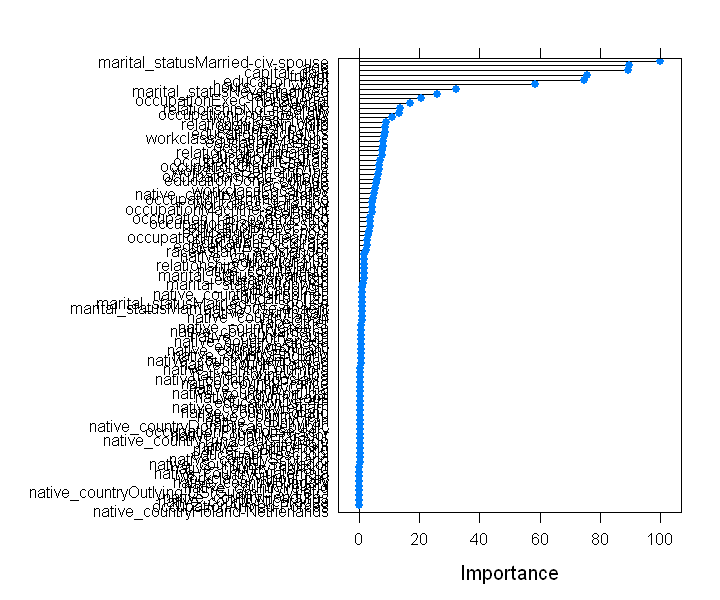

In [17]:

var_imp = varImp(rf.fit_inside)
print(var_imp)
plot(var_imp)


It is confirmed that race and native_country should be out of the picture in this case. We deselect these two factors and now we can put into our model. We still set our tuneGrid as mtry (5,10,15) to see the best number of variables to put into the model

In [18]:
vaReduced <- colnames(subset(d, select = -c(native_country, race)))

d1<-d[, vaReduced]
weights = ifelse(d1$income == "low", 0.9, 0.1)

fitControl <- trainControl(method = "cv",
                           number = 5,
                           returnResamp="all",
                           savePredictions = TRUE,
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)
paraGrid = expand.grid(mtry = c(5, 10, 15))
set.seed(1234)
rf.fit_inside1 = train(income~., 
                      data = d1,
                      method = "rf", 
                      trControl = fitControl,
                      tuneGrid = paraGrid,
                      weights = weights,
                      metric = "ROC") 
print(rf.fit_inside1)

Random Forest 

6033 samples
  12 predictor
   2 classes: 'high', 'low' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4827, 4827, 4826, 4825, 4827 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   5    0.8961473  0.5972071  0.9373183
  10    0.9007890  0.6358117  0.9265032
  15    0.8988287  0.6264850  0.9225312

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.


let's test on outside loop by setting our paraGrid to the selected mtry. To do that, we set call out the mtry by using this syntax: name_of_the_model_$finalModel$mtry, then put it in out tuneGrid and evalute our result. 

In [19]:
paramGrid <- expand.grid(mtry = c(rf.fit_inside1$finalModel$mtry))

set.seed(5678)
rf_fit_outside_pr <- train(income ~ ., 
                           data = d1,  
                           method = "rf", # Random forest model 
                           trControl = fitControl, 
                           tuneGrid = paramGrid, 
                           weights = weights,
                           metric = "ROC")
print(rf_fit_outside_pr)
print_metrics = function(mod){
  means = c(apply(mod$resample[,1:4], 2, mean), mtry = 10, Resample = 'Mean')
  stds = c(apply(mod$resample[,1:4], 2, sd), mtry =10, Resample = 'STD')
  out = rbind(mod$resample, means, stds)
  out[,1:4] = lapply(out[,1:4], function(x) round(as.numeric(x), 3))
  out
}
print_metrics(rf_fit_outside_pr)

Random Forest 

6033 samples
  12 predictor
   2 classes: 'high', 'low' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 4827, 4826, 4827, 4825, 4827 
Resampling results:

  ROC        Sens       Spec     
  0.9006101  0.6298494  0.9254031

Tuning parameter 'mtry' was held constant at a value of 10


ROC,Sens,Spec,mtry,Resample
0.912,0.660,0.934,10,Fold1
0.881,0.581,0.925,10,Fold2
0.898,0.627,0.908,10,Fold3
0.903,0.645,0.924,10,Fold4
0.909,0.637,0.936,10,Fold5
0.901,0.630,0.925,10,10
0.013,0.030,0.011,0,10


As can be seen from the metric, out std is way samller than our mean of all those resamples. It is justified to use this approach. 


Notice that there are many ways to improve this process. First, education_num can be categoried into few factors instead 
leaving too many factors in one level. It will speed to the process in buliding models. 

We could drop the race and country factor after our explorable analysis, it can be clearly seen from the plot that it has 
close-to-zero connection between these two variables to the prediction income variable. 

We can use gplots to quickly sketting out the ration of each categorical variable compared to income. 


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



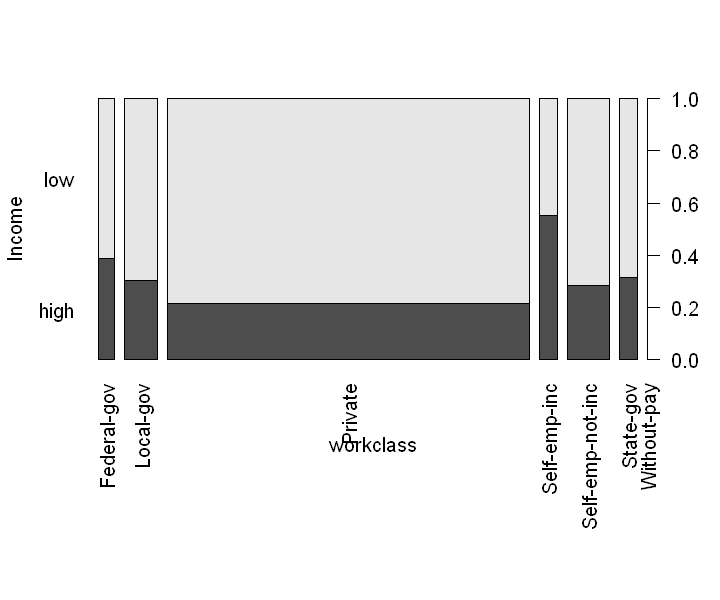

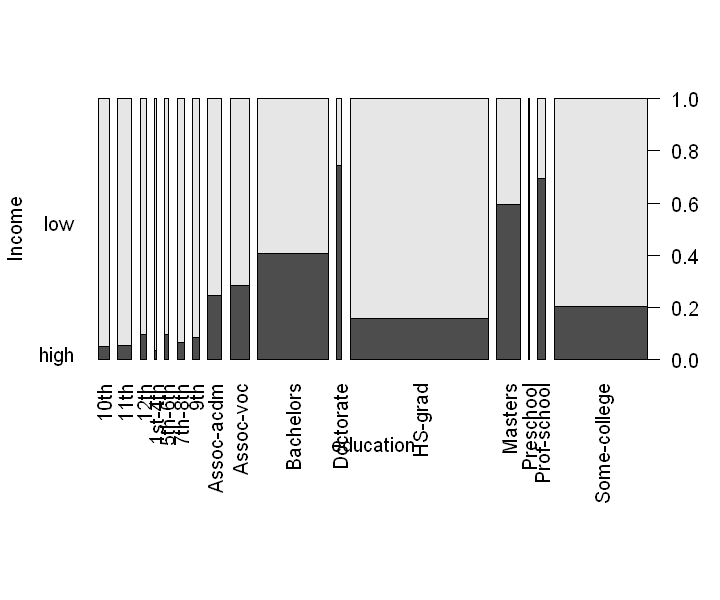

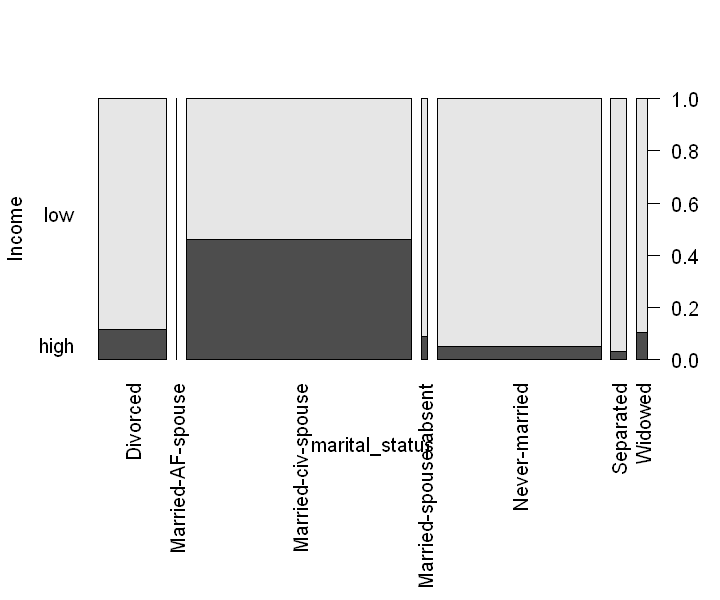

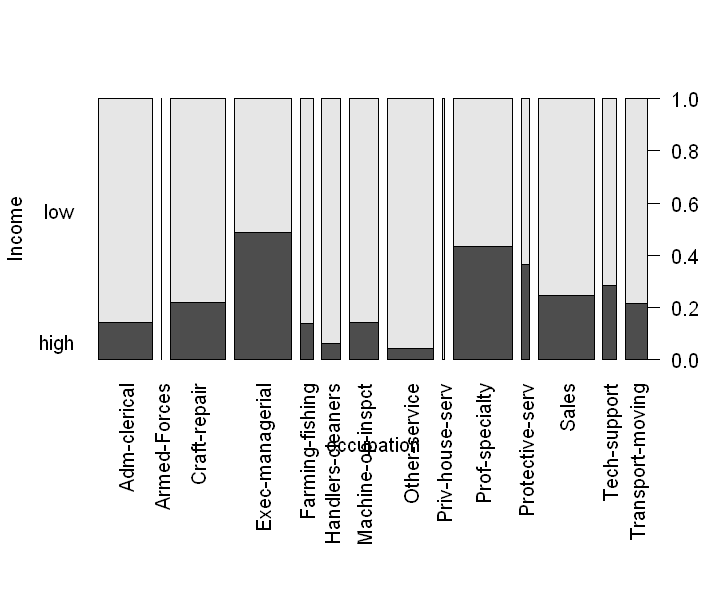

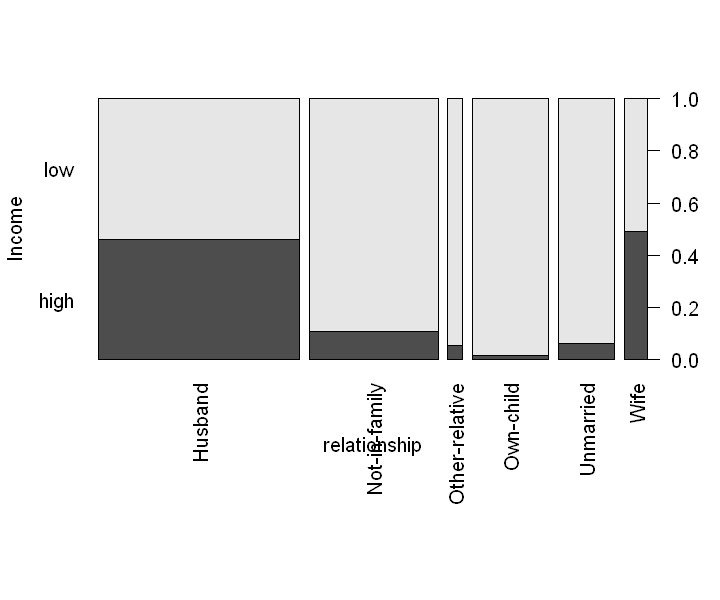

null device 
          1

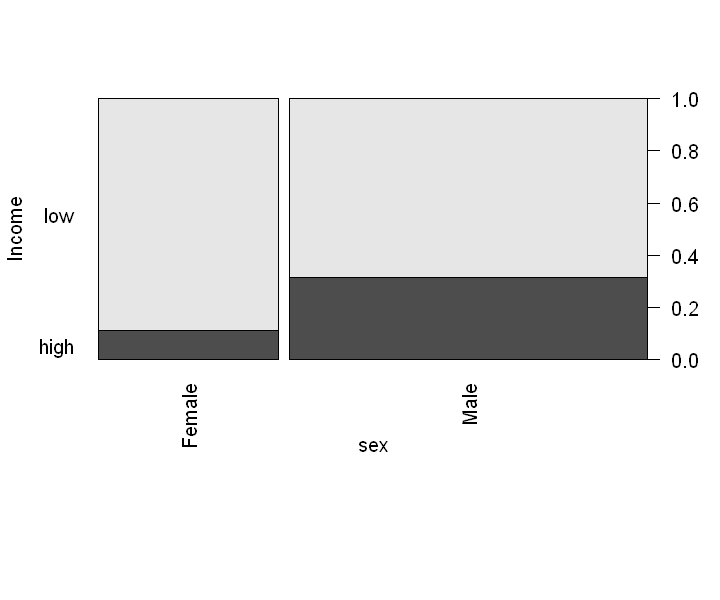

In [22]:
library(gplots)

charcolsD1=colnames(dplyr::select_if(d1, is.factor))
par(mfrow= c(1,1))
 
gplotVar<- function(var, data){
  # adjusting the margin using par(mai= c(bottom, left, top,right ))
  par(mai=c(2,0.82,0.82,0.6))
  #set the lable to rotate vertically
  par(las =2)
  for (col in var) {
    plot(d1[,col], data$income, xlab=col,
         ylab = "Income")
  }
  dev.off() 
}
gplotVar(charcolsD1, d1)
